In [2]:
#Loading all the relevant libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,minmax_scale,PolynomialFeatures,StandardScaler,Normalizer
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import train_test_split
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, Dense

import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import keras
import sys
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import lightgbm as lgb

Using TensorFlow backend.


In [3]:
data=pd.read_excel('SELL_2.xlsx')

In [4]:
data.head()

,Date,PKod,Pgroup,Pname,Quantity,Price,Net cost
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1,177.0,177
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1,32.0,32
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4,268.0,1072
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4,268.0,1072
4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4,268.0,1072


In [5]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.Date= monthly_data.Date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('Date')['Quantity'].sum().reset_index()
    monthly_data.Date = pd.to_datetime(monthly_data['Date'])
    return monthly_data


In [6]:
monthly_df = monthly_sales(data)
monthly_df


,Date,Quantity
0,2018-01-01,277418
1,2018-02-01,294867
2,2018-03-01,302206
3,2018-04-01,230574
4,2018-05-01,286803
5,2018-06-01,308701
6,2018-07-01,198176
7,2018-08-01,2565706
8,2018-09-01,1749025
9,2018-10-01,2068872


In [7]:
def plot_sales(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    plt.xticks(rotation=90)
    
    sns.despine()

In [8]:
def prod_sales(data):
  prod_data=data.copy()
  prod_data=prod_data.groupby('Pgroup')['Quantity'].sum().reset_index()
  return prod_data
  

                                       Pgroup  Quantity
0                               ART._HYGIENIC       222
1                        ARTICLE_OF_HOUSEHOLD        87
2                                        BEER     50710
3                                       BREAD    412603
4                                 CANNED_PATE    134680
5                                   CHEMISTRY      9847
6                        CHEWING_GUM_LOLIPOPS      3762
7                                CHIPS_FLAKES      4028
8                                  CIGARETTES     22952
9                                  COFFEE TEA      2025
10                               COOKIES_BULK     66399
11                               DAIRY_CHESSE    123672
12                        DISHES_FOR_CHILDREN       166
13                                DRINK_JUICE     27911
14                                       EGGS      1383
15                                       FISH     25873
16                                    GENERAL   

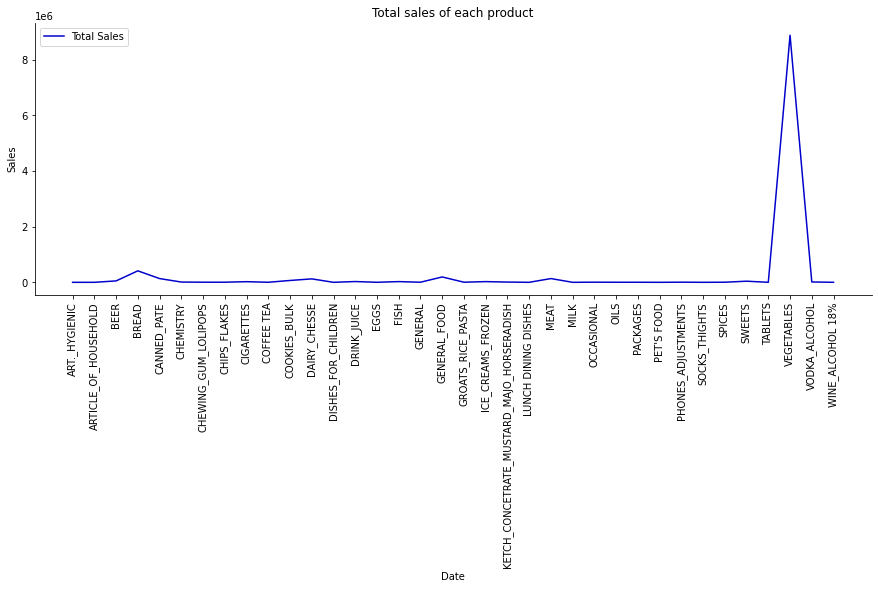

In [9]:
prod_data=prod_sales(data)
print(prod_data)
plot_sales(prod_data,'Pgroup','Quantity','Total sales of each product')

In [10]:
def mon_prod(data,pname):
  pdata=data[data.Pgroup==pname]
  pdata.Date= pdata.Date.apply(lambda x: str(x)[:-3])
  pdata =pdata.groupby('Date')['Quantity'].sum().reset_index()
  pdata.Date = pd.to_datetime(pdata['Date'])
  return pdata

         Date  Quantity
0  2018-01-01      2981
1  2018-02-01      2966
2  2018-03-01      3691
3  2018-04-01      4271
4  2018-05-01      4940
5  2018-06-01      5324
6  2018-07-01      5784
7  2018-08-01      6107
8  2018-09-01      4755
9  2018-10-01      3456
10 2018-11-01      3481
11 2018-12-01      2954


C:\Users\SAKSHEE\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


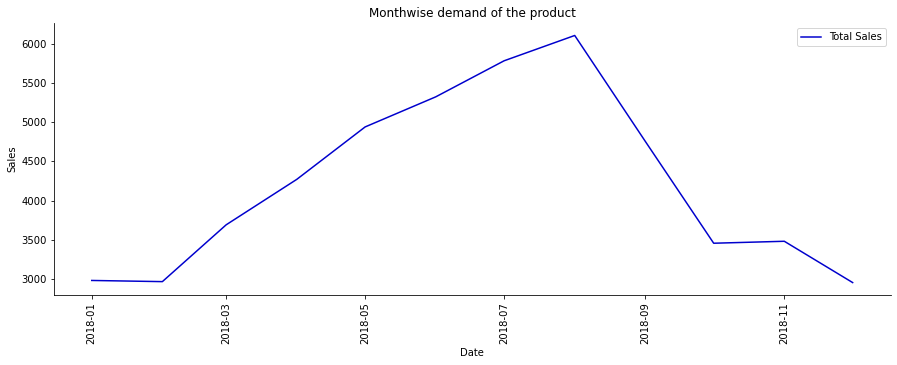

In [105]:
pname='BEER'#input("Enter product name to check its monthwise demand")
pdata=mon_prod(data,pname)
print(pdata)
plot_sales(pdata,'Date','Quantity','Monthwise demand of the product')

In [60]:
prodname=input("Enter product name to check its monthwise demand")
proddata=data.loc[data['Pgroup']==prodname]
proddata

Enter product name to check its monthwise demandBEER


,Date,PKod,Pgroup,Pname,Quantity,Price,Net cost
1172,2018-01-01,17506,BEER,PIWO BOJAN WIELKOP.0_5 L B/ZW,3,25.0,75
1173,2018-01-01,7740,BEER,PIWO BOJAN FAJRANT 0_5 L B/ZWR,7,161.0,1127
1174,2018-01-01,19093,BEER,PIWO BOJAN KOKOS 0_5 L B/ZWR,1,302.0,302
1175,2018-01-01,17985,BEER,PIWO BOJAN STRAZACKIE 0_5 L B/ZW,1,25.0,25
1176,2018-01-01,5231,BEER,PIWO BOJAN SZWEJK 0_5 L B/ZWROT,5,237.0,1185
...,...,...,...,...,...,...,...
22548,2018-12-01,327,BEER,PIWO ZUBR 0_5L PUSZKA,143,181.0,25883
22549,2018-12-01,18383,BEER,PIWO ZYWIEC 0% 0_5 L BUT/ZW,6,177.0,1062
22550,2018-12-01,298,BEER,PIWO ZYWIEC 0_5L BUTELKA,13,177.0,2301
22551,2018-12-01,17854,BEER,PIWO ZYWIEC PORTER 0_5L,2,297.0,594


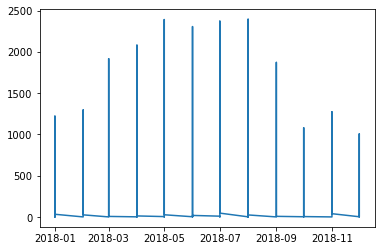

In [61]:
plt.plot(proddata.Date,proddata.Quantity)

In [18]:
prodata.Date=pd.to_datetime(prodata.Date)
prodata=proddata.set_index('Date')

NameError: name 'prodata' is not defined

In [100]:
proddata=proddata.drop(['PKod','Pgroup','Pname','Price','Net cost'],axis=1)

In [101]:
proddata.Date=pd.to_datetime(proddata.Date)
proddata=proddata.set_index('Date')

In [102]:
proddata

,Quantity
Date,
2018-01-01,3
2018-01-01,7
2018-01-01,1
2018-01-01,1
2018-01-01,5
...,...
2018-12-01,143
2018-12-01,6
2018-12-01,13


In [35]:
train,test=proddata[:-12],proddata[-12:]

In [36]:
train

,Quantity
Date,
2018-01-01,3
2018-01-01,7
2018-01-01,1
2018-01-01,1
2018-01-01,5
...,...
2018-12-01,396
2018-12-01,8
2018-12-01,194


In [37]:
test

,Quantity
Date,
2018-12-01,2
2018-12-01,1
2018-12-01,369
2018-12-01,1
2018-12-01,13
2018-12-01,4
2018-12-01,1007
2018-12-01,143
2018-12-01,6


In [38]:
scaler=MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

In [41]:
n_input=12
n_features=1

generator=TimeseriesGenerator(train,train,length=n_input,batch_size=6)

model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator,epochs=180)

Epoch 1/180
146/146 [==============================] - 3s 20ms/step - loss: 0.0090
Epoch 2/180
146/146 [==============================] - 2s 15ms/step - loss: 0.0089
Epoch 3/180
146/146 [==============================] - 2s 15ms/step - loss: 0.0088
Epoch 4/180
146/146 [==============================] - 2s 15ms/step - loss: 0.0089
Epoch 5/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0087
Epoch 6/180
146/146 [==============================] - 2s 15ms/step - loss: 0.0088
Epoch 7/180
146/146 [==============================] - 2s 15ms/step - loss: 0.0087
Epoch 8/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0087
Epoch 9/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0087
Epoch 10/180
146/146 [==============================] - 2s 16ms/step - loss: 0.0086
Epoch 11/180
146/146 [==============================] - 2s 16ms/step - loss: 0.0086
Epoch 12/180
146/146 [==============================] - 2s 17ms/step - loss: 0.0085
E

146/146 [==============================] - 2s 15ms/step - loss: 0.0044
Epoch 98/180
146/146 [==============================] - 2s 15ms/step - loss: 0.0044
Epoch 99/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0041
Epoch 100/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0039
Epoch 101/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0039
Epoch 102/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0039
Epoch 103/180
146/146 [==============================] - 2s 12ms/step - loss: 0.0039
Epoch 104/180
146/146 [==============================] - 2s 13ms/step - loss: 0.0037
Epoch 105/180
146/146 [==============================] - 2s 13ms/step - loss: 0.0043
Epoch 106/180
146/146 [==============================] - 2s 14ms/step - loss: 0.0041
Epoch 107/180
146/146 [==============================] - 2s 16ms/step - loss: 0.0041
Epoch 108/180
146/146 [==============================] - 2s 16ms/step - loss: 0.0

# Iske niche ka galat he

In [95]:
pred_list=[]

batch=train[-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:, 1:,:],[[pred_list[i]]],axis=1)

In [96]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=proddata[-n_input:].index,columns=['Predictions'])


In [104]:
df_predict.tail()

,Predictions
22548,242.794921
22549,21.515428
22550,347.823533
22551,124.864807
22552,156.098700


In [103]:
proddata

,Quantity
Date,
2018-01-01,3
2018-01-01,7
2018-01-01,1
2018-01-01,1
2018-01-01,5
...,...
2018-12-01,143
2018-12-01,6
2018-12-01,13


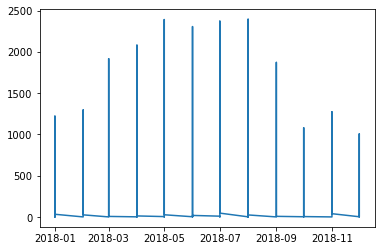

In [91]:
from sklearn.metrics import mean_absolute_error
plt.plot(proddata.Date,proddata.Quantity)


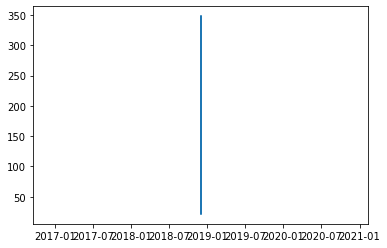

In [93]:
plt.plot(df_predict)